# importing data from kaggle using kagglehub

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
paultimothymooney_chest_xray_pneumonia_path = kagglehub.dataset_download('paultimothymooney/chest-xray-pneumonia')

print('Data source import complete.')

Data source import complete.


In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
paultimothymooney_chest_xray_pneumonia_path

'/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2'

In [4]:
os.listdir('/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/')

['val', 'chest_xray', '__MACOSX', 'train', 'test']

In [5]:
train='/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train'
test='/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test'
valid='/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val'

In [6]:
print(os.listdir(train)), print(os.listdir(test)), print(os.listdir(valid))

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


(None, None, None)

# Loading images using image_dataset_from_directory module

In [7]:
from keras.preprocessing import image_dataset_from_directory

train_data = image_dataset_from_directory(train,
                                          label_mode='binary',
                                          image_size=(224, 224),
                                          subset='training',
                                          seed=123,
                                          validation_split=0.2)

valid_data = image_dataset_from_directory(train,
                                          label_mode='binary',
                                          image_size=(224, 224),
                                          subset='validation',
                                          seed=123,
                                          validation_split=0.2)

test_data = image_dataset_from_directory(test,
                                         image_size=(224, 224),
                                         label_mode='binary')

Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Found 5216 files belonging to 2 classes.
Using 1043 files for validation.
Found 624 files belonging to 2 classes.


In [8]:
shape=(224, 224, 3)

# Visualization

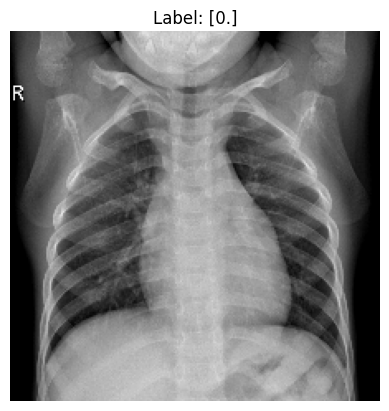

In [9]:
import matplotlib.pyplot as plt

for images, labels in train_data.take(1):
    plt.imshow(images[0].numpy().astype("uint8")) # Using uint8 ensures that pixel values fall within 255 range
    plt.title(f"Label: {labels[0].numpy()}")
    plt.axis("off")
    plt.show()

In [10]:
for images, labels in train_data.take(1):
  NUM_CLASSES = len(labels.shape)

# Data Augmentation

In [11]:
from tensorflow.keras import layers
from tensorflow import keras

data_augmentation = keras.Sequential([
    layers.Input(shape),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2)
])

In [12]:
import tensorflow as tf

def apply_augmentation(image, label):
    image = data_augmentation(image)
    return image, label

train_ds = train_data.map(apply_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = valid_data.prefetch(buffer_size=tf.data.AUTOTUNE)

# Preparing the architecture to train images

In [13]:
from keras.layers import Dense, Rescaling, Conv2D, Input, Flatten, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dropout
from keras.models import Model, Sequential

# model = Sequential()

# model.add(Input(shape=shape))
# model.add(Rescaling(1. / 255))
# model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model.summary()

In [14]:
# from keras.optimizers import Adam

# opt = Adam(learning_rate=0.00001)

# model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# from keras.callbacks import EarlyStopping

# early = EarlyStopping(patience=5, monitor='val_loss',  restore_best_weights=True )

# Training

In [16]:
# model.fit(train_ds,
#           epochs=50,
#           validation_data=val_ds,
#           callbacks=[early])

In [17]:
# model.evaluate(test_data)

In [18]:
from keras.applications import VGG19

base_model = VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=shape,
    classes=NUM_CLASSES,
    pooling='max'
)

base_model.trainable = True

model_vgg19 = Sequential()
model_vgg19.add(Input(shape))
model_vgg19.add(Rescaling(1./255))

model_vgg19.add(base_model)
model_vgg19.add(Dense(512, activation='relu'))
model_vgg19.add(Dense(1, activation='sigmoid'))
model_vgg19.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg19 (Functional)                   │ (None, 512)                 │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,287,553 (77.39 MB)

 Trainable params: 20,287,553 (77.39 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from keras.optimizers import Adam

opt = Adam(learning_rate=0.00001)

model_vgg19.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
from keras.callbacks import EarlyStopping

early = EarlyStopping(patience=5, monitor='val_loss',  restore_best_weights=True )

In [21]:
model_vgg19.fit(train_ds,
          epochs=50,
          validation_data=val_ds,
          callbacks=[early])

Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.8130 - loss: 0.3841 - val_accuracy: 0.9291 - val_loss: 0.1878
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 108s 764ms/step - accuracy: 0.9408 - loss: 0.1659 - val_accuracy: 0.9636 - val_loss: 0.0966
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 143s 775ms/step - accuracy: 0.9536 - loss: 0.1275 - val_accuracy: 0.9760 - val_loss: 0.0764
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 144s 794ms/step - accuracy: 0.9544 - loss: 0.1143 - val_accuracy: 0.8696 - val_loss: 0.3358
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 103s 784ms/step - accuracy: 0.9706 - loss: 0.0923 - val_accuracy: 0.9645 - val_loss: 0.0864
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 142s 785ms/step - accuracy: 0.9678 - loss: 0.0806 - val_accuracy: 0.9521 - val_loss: 0.1118
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 100s 757ms/step - accuracy: 0.9717 - loss: 0.0766 - val_accuracy: 0.9396 - val_loss: 0.1429
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 146s 788ms/step - accuracy: 0.9734 - lo

In [38]:
model_vgg19.evaluate(val_ds)

33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.9823 - loss: 0.0615


[0.06966667622327805, 0.9769894480705261]

In [39]:
model_vgg19.evaluate(test_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.7626 - loss: 0.7325


[0.7416543364524841, 0.754807710647583]

In [28]:
# import keras
# from google.colab import files

# # Assuming you have a trained Keras model
# # Example: model = keras.models.Sequential([...])

# # Save your model to the local file system
# model_vgg19.save("my_model.keras")

# # Download the model to your local machine
# # files.download("my_model.keras")

In [ ]:
model_vgg19.save('my_model.keras')

# visualizing trained images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


<ipython-input-37-8d4686bd7569>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_class_label = class_names[int(actual_class)]


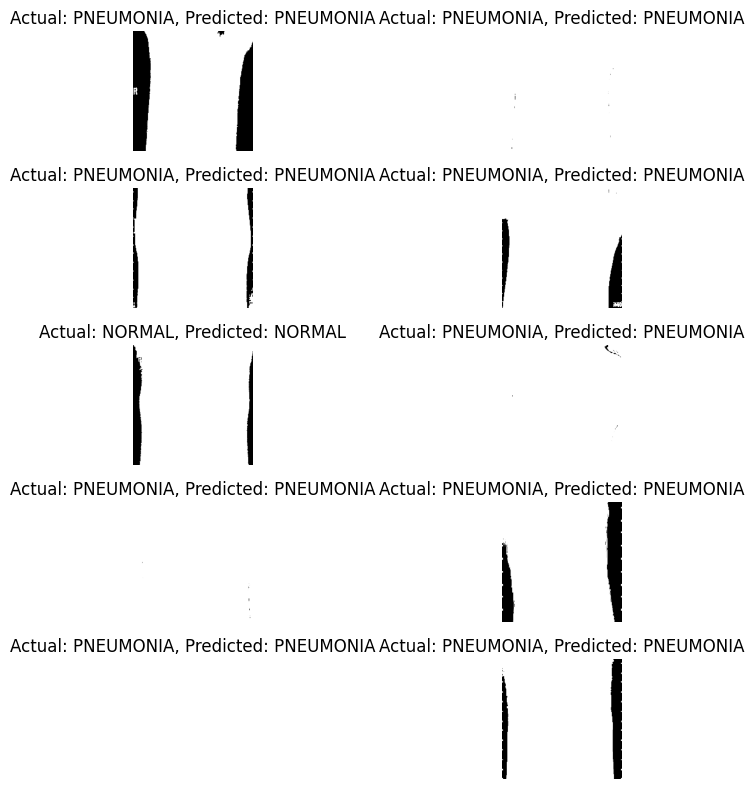

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt

images, labels = next(iter(train_data)) # accessing first batch or images and labels(using for image_dataset_from_directory module)

predicted_data = model_vgg19.predict(images)

predicted_labels = (predicted_data > 0.5).astype("int32")

# Number of images to display
num_images = 10

# Randomly select indices to display
random_indices = np.random.choice(images.shape[0], num_images, replace=False)

# Create a plot for the images
plt.figure(figsize=(10, 8))

for i, idx in enumerate(random_indices):
    actual_class = labels[idx].numpy()
    predicted_class = predicted_labels[idx][0]


    img = images[idx].numpy()
    img = np.clip(img, 0, 1)

    # Display the image
    plt.subplot(5, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')

    # class labels for actual and predicted classes
    class_names = train_data.class_names  # class names

    # Converting actual_class and predicted_class to scalar integers (index)
    actual_class_label = class_names[int(actual_class)]
    predicted_class_label = class_names[int(predicted_class)]

    # title
    plt.title(f"Actual: {actual_class_label}, Predicted: {predicted_class_label}")

# plotting
plt.tight_layout()
plt.show()
